## **UnivAI AI-4 Project CycleGANs to generate Ukiyo-e art**


<center>
<img src='https://drive.google.com/uc?id=1SVO3cWSwNKoEmcx-eROg9uxKlXrfsJx9' width =500>
</center>

####This NoteBook represents the learning/insights gained from the Paper:

####**Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks**
by:
1. Jun-Yan Zhu∗ 
2. Taesung Park∗ 
3. Phillip Isola Alexei 
4. A. Efros

**Berkeley AI Research Laboratory (BAIR), UC Berkeley**

<center>
<img src='https://drive.google.com/uc?id=1IgauODg7M6IaPLNMpIb6jN5dQO61NpZh' width =800>
</center>

<center>
<img src='https://drive.google.com/uc?id=1Jg9wbNbXWb_cbfFyvshpWzsuyVKHGCkT' width =400>
</center>

####**Team Members:**

**Active**:
Abhineet Sharma

**Inactive**:
1. Lokadithya Reddy (International Travel)
2. Adarsh Roy (Working Professional)
3. Raghav Sahni (Busy with College Studies)

####**Note** : I read a wonderful blog posted by Jason Brownlee on Machine Learning Mastery.

1. I believe in the policy of academic honesty and I will admit that I have taken help from their post.

2. The primary objective of this project was to never generate accurate results, rather understand the paper on the matter.

3. I assure you that this notebook is not a blatant and ludicrous copy paste work. I have understood each line of code from scratch and the concept behind the working of the model.


##**Problem Statement**


###CycleGANs to generate Ukiyo-e art
Image-to-image translation involves generating a new synthetic version of a given image with a specific modification. The CycleGAN is a technique that involves the automatic training of image-to-image translation models. The models are trained in an unsupervised manner using a collection of images from the source and target domain that do not need to be related in any way. **In this project, you will need to take in an input image and generate Ukiyo-e art**.


The core idea is to build and understand a CycleGAN to generate Ukiyo-e art. You will need to read the paper and implement your understanding in the notebook. **Treat this as a paper review more than an actual project**.  Your notebook needs to read as a report of the paper with detailed explanations.


**Note**: It does not matter how good your results are, we only want to check your understanding of CycleGANs. **Please spend more of your time understanding the paper, the models, and loss functions than getting perfect outputs**.

Your video, slides and poster will be evaluated based on your understanding of CycleGANs and not only the outputs your notebook generates.


### Don't Overscope 🙅‍♀️🙅‍♂️
This project can be either very simple or very challenging depending on how far you'd like to go. It's impossible to try everything in one week, so scope your project wisely. The bottom line is every group member should completely understand everything the group attempted. Don't use a model/algorithm you don't understand just because it performs better. The goal of the project is to practice what you learned, hone your research skills, and – most importantly – have great fun!



####**Importing Libraries**

In [1]:
# example of preparing the horses and zebra dataset
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

In [43]:
import tensorflow as tf

In [44]:
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate

In [4]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Reshape, Concatenate

####**Mounting Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
url_train_A ='/content/drive/MyDrive/ukiyoe2photo/trainA/'
url_train_B = '/content/drive/MyDrive/small_train_B/'

In [7]:
url_test_A = '/content/drive/MyDrive/ukiyoe2photo/testA/'
url_test_B = '/content/drive/MyDrive/ukiyoe2photo/testB/'

####**Paired Versus Unpaired Samples**

<center>
<img src='https://drive.google.com/uc?id=109d4Ubh50OPPOAGp7T1ScuReosLgYyju' width =450>
</center>

In [8]:
# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

#### **Loading the Train Data and Test Data for A** (ukiyo-e-art)

In [9]:
data_train_A = load_images(url_train_A)
data_test_A = load_images(url_test_A)

In [10]:
len(data_train_A)

562

In [11]:
len(data_test_A)

263

#### **Loading the Train Data and Test Data for B** (actual images of scenery)

In [12]:
data_train_B = load_images(url_train_B)
data_test_B = load_images(url_test_B)

####**Taking the First 10 samples from train and test (Both collections)**

In [13]:
data_train_A = data_train_A[:10]
data_train_B = data_train_B[:10]
data_test_A = data_test_A[:10]
data_test_B = data_test_B[:10]

In [14]:
dataA = vstack((data_train_A, data_test_A))

In [15]:
dataB = vstack((data_train_B, data_test_B))

####**Creating the dataset**

*The **.npz file format is a zipped archive of files named after the variables they contain.** The archive is not compressed and each file in the archive contains one variable in .npy format.*

In [16]:
filename = 'ukiyo.npz'
savez_compressed(filename, dataA, dataB)

In [17]:
# loading the DataSet
data = load('ukiyo.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)

Loaded:  (20, 256, 256, 3) (20, 256, 256, 3)


####**Ukiyo-E-Art Samples**

###**Train**

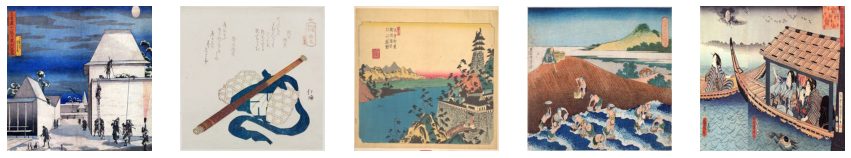

In [18]:
from matplotlib import pyplot
n_samples = 5
pyplot.figure(figsize=(15, 15))
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(data_train_A[i].astype('uint8'))

####**Test**

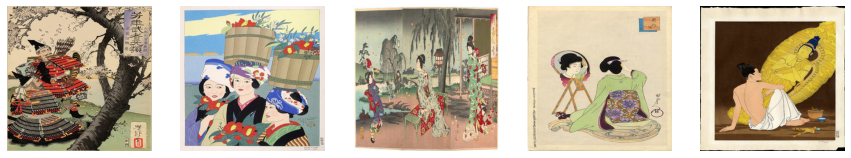

In [19]:
n_samples = 5
pyplot.figure(figsize=(15, 15))
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(data_test_A[i].astype('uint8'))

####**Actual Scenery**

####**Train**

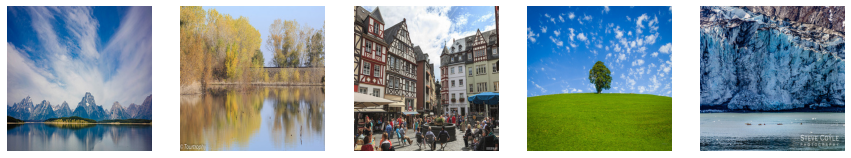

In [20]:
samples = 5
pyplot.figure(figsize=(15, 15))
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(data_train_B[i].astype('uint8'))



####**Test**

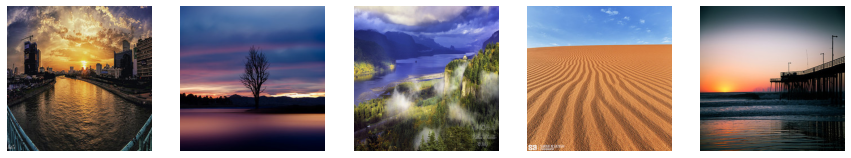

In [21]:
n_samples = 5
pyplot.figure(figsize=(15, 15))
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(data_test_B[i].astype('uint8'))

####**Instance Normalization Layer**

**This term was first mentioned in the paper**: 
<a href="https://openaccess.thecvf.com/content_cvpr_2017/papers/Ulyanov_Improved_Texture_Networks_CVPR_2017_paper.pdf">
<font color="black">
Improved Texture Networks: Maximizing Quality and Diversity in
Feed-forward Stylization and Texture Synthesis
</a>

<center>
<img src='https://drive.google.com/uc?id=1tp7Mw2xSZe59fZ7KquoX9kGTrS8keeB2' width =500>
</center>

####**Batch Normalization**

<center>
<img src='https://drive.google.com/uc?id=1Ptq8LyTs6UEIqTBfCeg9u7Ewbl0dbcM3' width =900>
</center>

####**Instance Normalization**


<center>
<img src='https://drive.google.com/uc?id=1lcJhU8Iv3p9HgkVhxP0hW1VksJLuTIDS' width =900>
</center>

<center>
<img src='https://drive.google.com/uc?id=1wHPlBKSaQf9ht4VEnBvdzdRW2J1n4ILo' width =900>
</center>

####**Source for the explanations aforementioned :** <a href=https://www.baeldung.com/cs/instance-vs-batch-normalization>Akbar Karimi</a>

**The authors of StyleGAN2 seek to remove these artifacts from generated images. They attribute the source of water droplets to restrictions on the generator imposed by the Adaptive Instance Normalization layers.**

In [22]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-eqvt7u1r
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-eqvt7u1r
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=5df78d1ae981c269cab19ba2b2b1dd4b468984aabcec98a1b8e984454a95685e
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhhjdnue/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [23]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
# define layer
layer = InstanceNormalization(axis=-1)

####**Taking limited Sample Images owing to the lack of resources for training a much better model**

In [24]:
print("The length of dataset A (Ukiyo-E_Art): ",len(data_train_A))
print("The length of dataset B (Actual Scenery): ",len(data_train_B))

The length of dataset A (Ukiyo-E_Art):  10
The length of dataset B (Actual Scenery):  10


In [25]:
image_shape_A = data_train_A[0].shape[1:]
image_shape_B = data_train_B[0].shape[1:]

In [26]:
image_shape_A

(256, 3)

In [27]:
image_shape_B

(256, 3)

In [28]:
image_shape = (256,256,3)

In [29]:
type(data_train_A)

numpy.ndarray

#### **GANS Architecture**


<center>
<img src='https://drive.google.com/uc?id=1wZ9GEYrhYR6iT8tpdVJo09kzR4KVGW5j' width =900>
</center>

**Citing the Paper here**:
*Regarding the discriminator networks, we use a 70×70 PatchGAN [15, 34]. Different from
vanilla GANs [11], PatchGAN learns to classify whether a
70 × 70 image patch is real or not. In comparison to vanilla
GANs. PatchGAN has fewer parameters and can be applied
to arbitrary images in a fully convolutional fashion [23].*

**PatchGAN is a type of discriminator for generative adversarial networks which only penalizes structure at the scale of local image patches.**

The PatchGAN discriminator tries to classify if each N x N  patch in an image is real or fake.

1. This discriminator is run convolutionally across the image, averaging all responses to provide the ultimate output of D. 
2. Such a discriminator effectively models the image as a Markov random field, assuming independence between pixels separated by more than a patch diameter. 
3. It can be understood as a type of texture/style loss.

####**Initializing the Weights**

**stddev** :	a python scalar or a scalar tensor. Standard deviation of 
the random values to generate.

In [37]:
init = RandomNormal(stddev=0.02)

In [39]:
def build_discriminator(IMG_SIZE=256):
  # Taking the image input
  in_image = Input(shape=image_shape)
  # C64
  dis = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
  dis = LeakyReLU(alpha=0.2)(dis)
  # C128
  dis = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(dis)
  dis = InstanceNormalization(axis=-1)(dis)
  dis = LeakyReLU(alpha=0.2)(dis)
  # C256
  dis = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(dis)
  dis = InstanceNormalization(axis=-1)(dis)
  dis = LeakyReLU(alpha=0.2)(dis)
  # C512
  dis = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(dis)
  dis = InstanceNormalization(axis=-1)(dis)
  dis = LeakyReLU(alpha=0.2)(dis)
  # second last output layer
  dis = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(dis)
  dis = InstanceNormalization(axis=-1)(dis)
  dis = LeakyReLU(alpha=0.2)(dis)

  # patch output
  patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(dis)
  model = Model(in_image, patch_out)
  model.compile(loss='mse', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss_weights=[0.5])
  return model

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 64)      3136      
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 128)       131200    
                                                                 
 instance_normalization_17 (  (None, 64, 64, 128)      256       
 InstanceNormalization)                                          
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                           

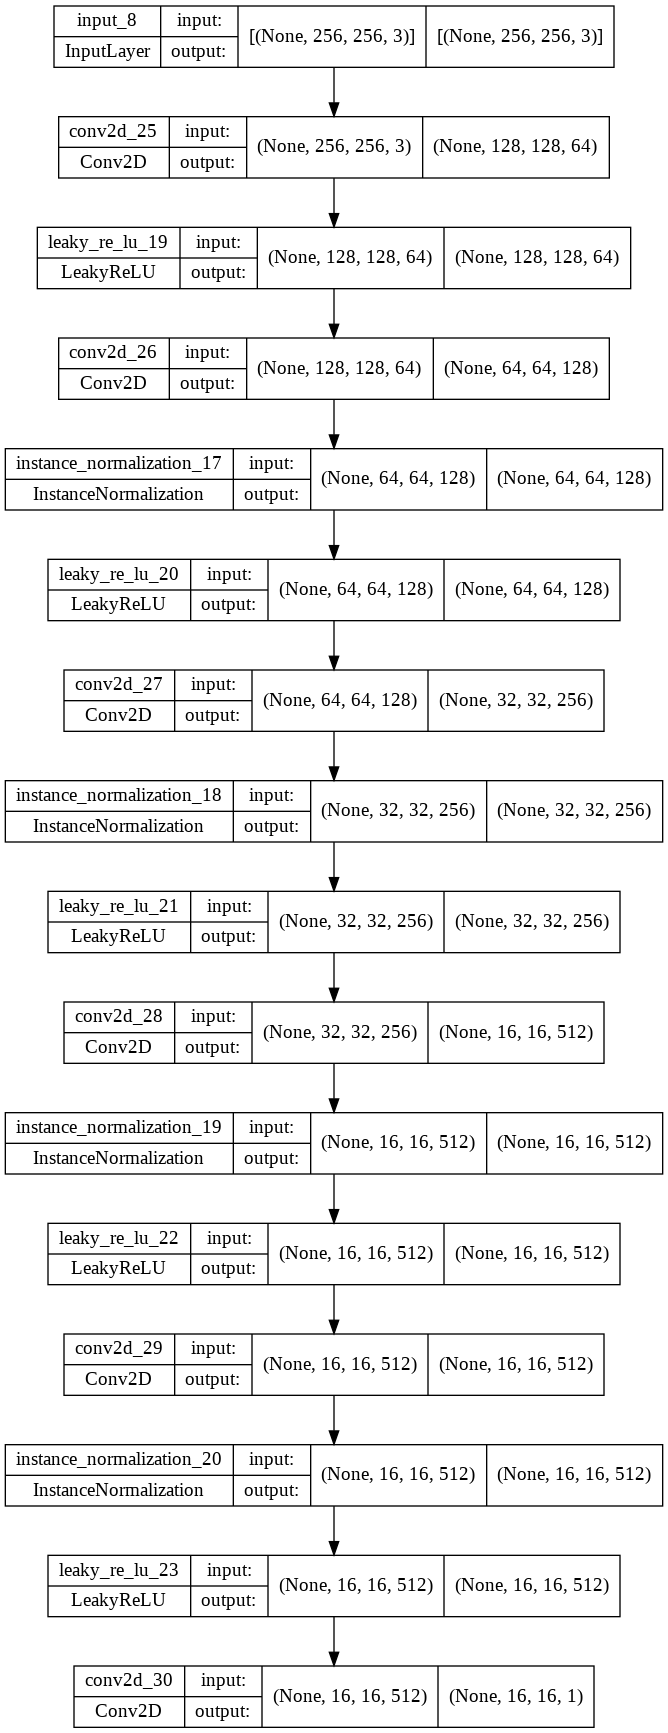

In [45]:
check_Arch_Dis = build_discriminator(256)
check_Arch_Dis.summary()
tf.keras.utils.plot_model(check_Arch_Dis, to_file='Dis.png', show_shapes=True, show_layer_names=True)

**Citing the paper here:**
*This network contains two stride-2 convolutions, a few residual blocks [12], and two fractional-strided
convolutions with stride 1/2. We use 6 blocks for 128 × 128
images, and 9 blocks for 256 × 256 and higher-resolution
training images..*

<center>
<img src='https://drive.google.com/uc?id=1COHJfzGDRpALO0mVHJy3NaRghd9apS87' width =700>
</center>

In [32]:
# generator a resnet block
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	res_block = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	res_block = InstanceNormalization(axis=-1)(res_block)
	res_block = Activation('relu')(res_block)
	# second convolutional layer
	res_block = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(res_block)
	res_block = InstanceNormalization(axis=-1)(res_block)
 
	# concatenate merge channel-wise with input layer
	res_block = Concatenate()([res_block, input_layer])
	return res_block

In [46]:
def build_generator(image_shape,n=9):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # image input
  in_image = Input(shape=image_shape)
  # c7s1-64
  gen = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
  gen = InstanceNormalization(axis=-1)(gen)
  gen = Activation('relu')(gen)
  # d128
  gen = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(gen)
  gen = InstanceNormalization(axis=-1)(gen)
  gen = Activation('relu')(gen)
  # d256
  gen = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(gen)
  gen = InstanceNormalization(axis=-1)(gen)
  gen = Activation('relu')(gen)
  # R256
  for _ in range(n):
    gen = resnet_block(256, gen)
  # u128
  gen = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(gen)
  gen = InstanceNormalization(axis=-1)(gen)
  gen = Activation('relu')(gen)
  # u64
  gen = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(gen)
  gen = InstanceNormalization(axis=-1)(gen)
  gen = Activation('relu')(gen)
  # c7s1-3
  gen = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(gen)
  gen = InstanceNormalization(axis=-1)(gen)
  out_image = Activation('tanh')(gen)
  # define model
  model = Model(in_image, out_image)
  return model

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 256, 256, 64  9472        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 instance_normalization_21 (Ins  (None, 256, 256, 64  128        ['conv2d_33[0][0]']              
 tanceNormalization)            )                                                           

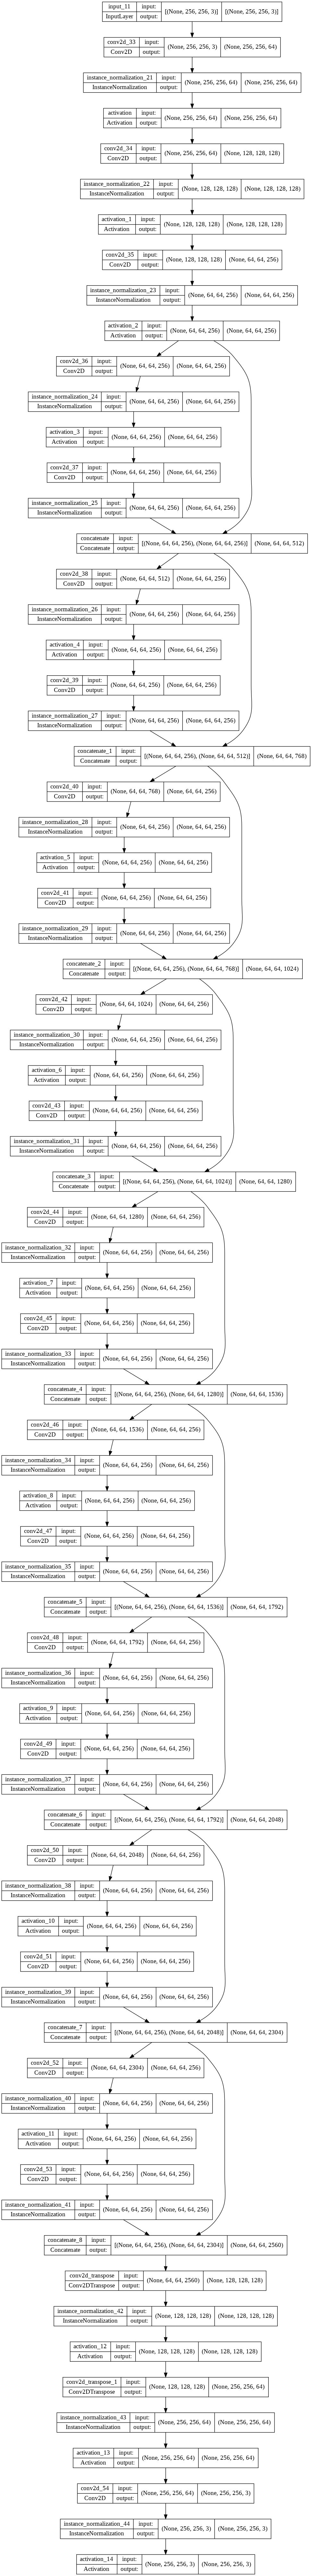

In [50]:
check_Arch_Gen = build_generator(image_shape)
check_Arch_Gen.summary()
tf.keras.utils.plot_model(check_Arch_Gen, to_file='gen.png', show_shapes=True, show_layer_names=True)

**Section 3.1** of **Unpaired Image-to-Image Translation
using Cycle-Consistent Adversarial Networks** 

**Adversarial Loss** : For the mapping function G : X → Y and its discriminator DY , we express the objective as:

***LGAN(G, DY , X, Y ) = Ey∼pdata(y)
[log DY (y)]
+Ex∼pdata(x)
[log(1 − DY (G(x))]***

<center>
<img src='https://drive.google.com/uc?id=1IaPaejcOjphcEQhQIBz9GSuHyp1oQPP5' width =900>
</center>

**Section 3.2** of **Unpaired Image-to-Image Translation
using Cycle-Consistent Adversarial Networks**

**Cycle Consistency Loss**: for each image x from domain X, the image translation cycle should be able to bring x back to the original image, i.e. x → G(x) → F(G(x)) ≈ x. 

We call it forward cycle consistency. Similarly, as illustrated in Figure 3 (c), for each
image y from domain Y , G and F should also satisfy the
backward cycle consistency: y → F(y) → G(F(y)) ≈ y.
We formulate the cycle consistency loss as

***Lcyc(G, F) =Ex∼pdata(x)
[kF(G(x)) − xk1]
+Ey∼pdata(y)
[kG(F(y)) − yk1]***

In [51]:
def GANS_model(g_model_1, d_model, g_model_2, image_shape):
  # ensure the model we're updating is trainable
  g_model_1.trainable = True
  # mark discriminator as not trainable
  d_model.trainable = False
  # mark other generator model as not trainable
  g_model_2.trainable = False
  # discriminator element
  input_gen = Input(shape=image_shape)
  gen1_out = g_model_1(input_gen)
  output_d = d_model(gen1_out)
  
  # identity element
  input_id = Input(shape=image_shape)
  output_id = g_model_1(input_id)
  
  # forward cycle
  output_f = g_model_2(gen1_out)

  # backward cycle
  gen2_out = g_model_2(input_id)
  output_b = g_model_1(gen2_out)
  
  # define model graph
  model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
  # define optimization algorithm configuration
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  
  # compile model with weighting of least squares loss and L1 loss
  model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
  return model


**loss_weights**: Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs. 

**The loss value that will be minimized by the model will then be the weighted sum of all individual losses, weighted by the loss_weights coefficients**. 

1. If a list, it is expected to have a 1:1 mapping to the model's outputs. 
2. If a dict, it is expected to map output names (strings) to scalar coefficients.

**Cycle consistency is a concept from machine translation where a phrase translated from English to French should translate from French back to English and be identical to the original phrase. The reverse process should also be true.**

####**English to Japanese**

<center>
<img src='https://drive.google.com/uc?id=149pT-bEnfaT13MA94yGnl1Cu8lyKRB1l' width =900>
</center>

####**Japanese to English**

<center>
<img src='https://drive.google.com/uc?id=1t5DLmz3kJ1g9WuUSI7L2Yb35HFkl2xhB' width =900>
</center>

```markdownn
-----------------------------------------------------------------------------------
|          Forward Cycle Loss             |          Backward Cycle Loss          |
------------------------------------------|----------------------------------------
1. Input of photo of Ukiyo-e-Art to G1    | 1. Input of photo of Scenery to G2
2. The output of G1 is the Scenery        | 2. The output of G2 is the Ukiyo-e-Art
3. G1 output is given as an input to G2   | 3. G2 output is given as an input to G1
4. G2 generates Ukiyo-e-Art               | 4. G1 generates Scenery 
```


####In the end , we compare whether the images in the start and the ones generated in the final output are similar or not


####**Identity Loss:** L1 or mean absolute error


<center>
<img src='https://drive.google.com/uc?id=1ON4lYXKoFJkN5IErgf40LtyUTzPRdJLs' width =450>
</center>

####**Saving the Models (Generators)**

In [52]:
# save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
	# save the first generator model
	filename1 = 'gen_AtoB_%06d.h5' % (step+1)
	g_model_AtoB.save(filename1)
	# save the second generator model
	filename2 = 'gen_BtoA_%06d.h5' % (step+1)
	g_model_BtoA.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

####**Normalizing the Images**

In [53]:
def normalize(filename):
  data = load(filename)
  # unpack arrays
  A, B = data['arr_0'], data['arr_1']
  # scale from [0,255] to [-1,1]
  A = (A - 127.5) / 127.5
  B = (B - 127.5) / 127.5
  return [A, B]

####**Generating Real Samples**

In [54]:
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	index = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	images = dataset[index]
	# generate 'real' class labels (1)
	labels = ones((n_samples, patch_shape, patch_shape, 1))
	return images, labels

####**Generating Fake Samples**

In [55]:
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	images = g_model.predict(dataset)
	# create 'fake' class labels (0)
	labels = zeros((len(images), patch_shape, patch_shape, 1))
	return images, labels

####**Updating the image pool**

In [56]:
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			index = randint(0, len(pool))
			selected.append(pool[index])
			pool[index] = image
	return asarray(selected)

####**Function for plotting Generated Images and for checking the performance**

In [57]:
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0

	# plot real images
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_in[i])
	
	# plot translated image
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_out[i])
	
	# save plot to file
	filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
	pyplot.savefig(filename1)
	pyplot.close()

####**Defining the train function**

In [59]:
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
	# define properties of the training run
	n_epochs, n_batch, = 1, 1
	
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	
	# unpack dataset
	train_A, train_B = dataset
	
	# prepare image pool for fakes
	pool_A, pool_B = list(), list()
	
	# calculate the number of batches per training epoch
	bat_per_epoch = int(len(train_A) / n_batch)
	
	# calculate the number of training iterations
	n_steps = bat_per_epoch * n_epochs
	
	# manually enumerate epochs
	for i in range(n_steps):
		
		# select a batch of real samples
		X_realA, y_realA = generate_real_samples(train_A, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(train_B, n_batch, n_patch)
		
		# generate a batch of fake samples
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		
		# update fakes from pool
		X_fakeA = update_image_pool(pool_A, X_fakeA)
		X_fakeB = update_image_pool(pool_B, X_fakeB)
		
		# update generator B->A via adversarial and cycle loss
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
	  # A -> B -> A
		
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		
		# update generator A->B via adversarial and cycle loss
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
	  # B -> A -> B
		
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		
		# summarize performance
		print('>%d, dA[%.4f,%.4f] dB[%.4f,%.4f] g[%.4f,%.4f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
		
		# evaluate the model performance every so often
		if (i+1) % (bat_per_epoch * 1) == 0:
			# plot A->B translation
			summarize_performance(i, g_model_AtoB, train_A, 'AtoB')
			# plot B->A translation
			summarize_performance(i, g_model_BtoA, train_B, 'BtoA')
		if (i+1) % (bat_per_epoch * 5) == 0:
			# save the models
			save_models(i, g_model_AtoB, g_model_BtoA)

####**Loading the dataset**

In [60]:
dataset = normalize('ukiyo.npz')

####**Calling Generator and Discriminator Functions**

In [61]:
# generator: A -> B
gen_AtoB = build_generator(image_shape)
# generator: B -> A
gen_BtoA = build_generator(image_shape)

# discriminator: A -> [real/faux]
dis_A = build_discriminator(256)
# discriminator: B -> [real/faux]
dis_B = build_discriminator(256)

####**Composite Models**

In [62]:
# composite: A -> B -> [real/faux, A]
comp_AtoB = GANS_model(gen_AtoB, dis_B, gen_BtoA, image_shape)

In [63]:
# composite: B -> A -> [real/faux, B]
comp_BtoA = GANS_model(gen_BtoA, dis_A, gen_AtoB, image_shape)

####**Calling the Train Function**

####In the paper, the model was trained till 100 epochs but owing to the limitation of resources, I trained the model for an epoch over a small sample of images

In [64]:
# train models 
train(dis_A, dis_B, gen_AtoB, gen_BtoA, comp_AtoB, comp_BtoA, dataset)

>1, dA[1.0180,0.9516] dB[1.5737,0.7953] g[19.2849,18.2842]
>2, dA[1.8076,1.0915] dB[7.5063,0.7935] g[18.6209,18.1951]
>3, dA[5.1389,1.2911] dB[12.2915,4.3429] g[20.4203,17.1960]
>4, dA[1.9187,1.4623] dB[2.3107,0.7746] g[15.9641,18.5069]
>5, dA[3.2455,1.8062] dB[0.6945,1.8543] g[17.1255,16.8661]
>6, dA[1.1025,3.0791] dB[3.4496,4.3493] g[15.5952,17.7902]
>7, dA[1.0613,4.7908] dB[4.1457,1.6804] g[16.7341,21.9011]
>8, dA[1.0536,4.5025] dB[4.5062,1.2787] g[14.6574,17.5378]
>9, dA[1.3146,2.4647] dB[2.3870,0.8857] g[15.3130,18.1195]
>10, dA[1.4385,3.0233] dB[1.5790,0.6235] g[13.6417,18.5791]
>11, dA[1.3026,3.3792] dB[1.0893,1.4084] g[17.7687,19.5531]
>12, dA[2.8319,1.0847] dB[1.2609,1.3763] g[12.5540,16.0143]
>13, dA[6.2262,1.1618] dB[0.6594,4.7624] g[15.5002,14.5376]
>14, dA[2.7837,1.0045] dB[1.0866,3.1133] g[13.1136,11.9497]
>15, dA[0.9857,0.7473] dB[0.6896,0.9056] g[14.4035,14.2214]
>16, dA[1.0810,0.6946] dB[0.8491,2.0864] g[14.0480,12.5532]
>17, dA[1.1264,0.5668] dB[0.8195,2.0650] g[12.59

**Time Taken to train the model** : 1h 1m 18s (one epoch and just sampled 20 images)

####**Results**

####**Images Generated from A to B**


<center>
<img src='https://drive.google.com/uc?id=1c19VVy3AS0UinvrafHo8OjJM_96ReJY_' width =750>
</center>

####**Images Generated from B to A**


<center>
<img src='https://drive.google.com/uc?id=1_YPqpdYkgyG4ZXuSirTWBBOJv5jgpA9n' width =750>
</center>
